In [3]:
import numpy as np
import pandas as pd
from scipy.stats import norm as normal, binom
import bplot as bp
from scipy.optimize import minimize
from scipy.special import loggamma
import patsy

# 28, October 2019

In [16]:
def ll_normal(beta, yX):
    y = yX[:, 0]
    X = yX[:, 1:]
    N = X.shape[0]
    mu = np.full(N, np.nan)
    for n in range(N):
        mu[n] = np.sum(X[n, :] * beta)
        
    d = y - mu
    return np.sum(d*d)

def optim(data, initval = None):
    return minimize(ll_normal, (initval if initval else np.random.normal()), args=(data), method="BFGS")["x"]

def bootstrap(data, R, fun, confidence=87):
    N = data.size
    thetas = np.full(R, np.nan)
    for r in range(R):
        idx = np.random.choice(N, N, replace=True)
        thetas[r] = fun(data[idx])
    cmin = (100-confidence)/2
    cmax = cmin + confidence
    return np.percentile(thetas, [cmin, cmax])

## Two-Sample Means

Are the means of total lengths different for the different populations, for our dataset of possums. We are interested in the different means of two different populations and comparing them.

To do this, we will take the means of the first alphabetical item $ \beta _0 $ and compare it to the next mean, the difference being $\beta_1$

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/possum.csv")
df.head()

,site,pop,sex,age,headL,skullW,totalL,tailL
0,1,vic,m,8.0,94.1,60.4,89.0,36.0
1,1,vic,f,6.0,92.5,57.6,91.5,36.5
2,1,vic,f,6.0,94.0,60.0,95.5,39.0
3,1,vic,f,6.0,93.2,57.1,92.0,38.0
4,1,vic,f,2.0,91.5,56.3,85.5,36.0


In [17]:
X = patsy.dmatrix(" ~C(pop)", data=df)

yX = np.c_[df["totalL"], X]

In [95]:
minimize(ll_normal, np.random.normal(size=2), args=(yX), method="BFGS")["x"]

df.groupby('pop').agg("mean")

,site,age,headL,skullW,totalL,tailL
pop,,,,,,
other,5.482759,3.689655,92.606897,57.065517,86.787931,37.862069
vic,1.282609,4.022727,92.597826,56.654348,87.467391,35.934783


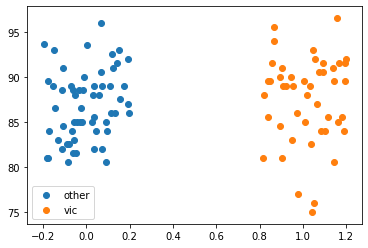

In [101]:
for i, (name, gdf) in enumerate(df.groupby('pop')):
    bp.jitter(np.repeat(i, gdf['totalL'].size), gdf['totalL'], jitter_y=0, label=name, color = bp.color[i])
bp.legend()